In [1]:
from IPython.display import HTML

HTML('''
<script>
function hide_code() {
  $('div.input').hide();
}

function show_code() {
  $('div.input').show();
}
</script>

<form action="javascript:hide_code()">
  <input type="submit" value="Hide Code">
</form>

<form action="javascript:show_code()">
  <input type="submit" value="Show Code">
</form>
''')

In [222]:
from IPython.display import HTML

HTML("""
<style>
.rendered_html h1, .rendered_html h2, .rendered_html h3 {
    color: #007996;  /* Change heading colors */
}
.rendered_html {
    font-family: "Arial, sans-serif"; /* Change font style */
}
.jp-Cell {
    border-radius: 10px;
    border: 1px solid #CCC;
    box-shadow: 3px 3px 5px #EEE;
}
</style>
""")

# Data Visualization
Overview of my generated dataframes for data visualization

In [13]:
import pandas as pd
crimeCount_byArea = pd.read_csv('crimeCount_byArea.csv')
specificCrimeCount_byArea = pd.read_csv('specificCrimeCount_byArea.csv')
crimeCountsVictSex = pd.read_csv('crimeCountsVictSex.csv')
crimeCountsVictSex_byArea = pd.read_csv('crimeCountsVictSex_byArea.csv')

# My Story and my WHY :-)

Hey everyone! So, my girl is a big true crime fan and she's planning a trip to Los Angeles next year with her friends. I thought it would be fun and useful to make her a special guide for the trip. Using a crime dataset from LA, I've put together a map that shows where it's safer and where you might want to be more careful.

I always thought LA was all about Hollywood and beaches, but working on this project, I've learned there's more to the city. It's been pretty cool to dig into the data and see the different sides of LA.

In this presentation, I'll share what I found. It's not just about keeping my friend safe; it's also about getting a real look at the city, beyond the usual tourist stuff. Let's dive in and see what LA is really like!

Just a heads-up: This is all about understanding the data and not about judging the people who live in LA. We know that crime doesn't exist in a vacuum – there are deeper social issues at play. This project is about getting a clearer, rational view of the city's crime scene, without any intention of discriminating against or stereotyping the residents. We're just looking at numbers and patterns to stay informed and safe

# Total Crime Cases

Check this out: From January 2020 to the end of July 2023, LA has seen a whopping 567,360 crime cases. Yeah, you read that right. That's a massive number! To break it down, we're talking about an average of 13,194 cases every month. That's like 434 cases each day, or even more eye-opening, around 18 cases every single hour. That's a lot of action in the City of Angels, and it's not all about movie premieres and beach parties

In [213]:
totalCrimeCases = 567360
totalCrimeCases_aMonth = totalCrimeCases / 43
totalCrimeCases_aDay = totalCrimeCases / 1307
totalCrimeCases_aHour = totalCrimeCases / 31368



We were also interested which would be the best time of the year to visit LA. Therfore we looked at the cases of crime through all the month and found interessting insights. It seems that LA likes the summer and is not really motivated for crime activities from the beginnging of july until the end of december.

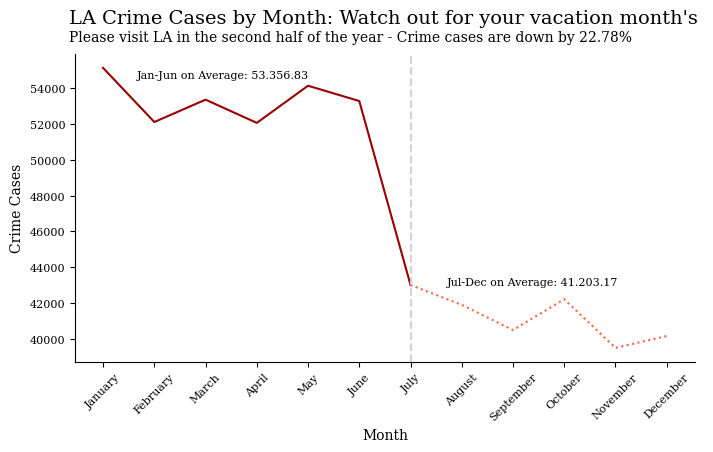

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


monthly_crime_counts = pd.read_csv('monthly_crime_counts.csv')
monthly_crime_counts['Month'] = monthly_crime_counts['Month'].apply(lambda x: calendar.month_name[x])

first_half = monthly_crime_counts[monthly_crime_counts['Month'].isin(calendar.month_name[1:7])]
second_half = monthly_crime_counts[monthly_crime_counts['Month'].isin(calendar.month_name[7:13])]

avg_first_half = round(first_half['Crime Count'].mean(),2)
avg_second_half = round(second_half['Crime Count'].mean(),2)

percent_change = ((avg_first_half - avg_second_half) / avg_first_half) * 100
percent_change_rounded = round(percent_change, 2)

avg_first_half_formatted = "{:,.2f}".format(avg_first_half).replace(",", ".")
avg_second_half_formatted = "{:,.2f}".format(avg_second_half).replace(",", ".")


plt.figure(figsize=(8, 4))
plt.rcParams["font.family"] = "serif"
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

sns.lineplot(x="Month", y="Crime Count", data=monthly_crime_counts[monthly_crime_counts['Month'].isin(calendar.month_name[1:8])], color="#990000")
sns.lineplot(x="Month", y="Crime Count", data=monthly_crime_counts[monthly_crime_counts['Month'].isin(calendar.month_name[7:13])],linestyle="dotted", color="#FF6347")

plt.axvline(x='July', color='lightgray', linestyle='--')

plt.text(x=-0.01, y=1.10, s="LA Crime Cases by Month: Watch out for your vacation month's ", fontsize=14, transform=plt.gca().transAxes)
plt.text(x=-0.01, y=1.04, s=f"Please visit LA in the second half of the year - Crime cases are down by {percent_change_rounded}%", fontsize=10, transform=plt.gca().transAxes)

plt.text(x=0.1, y=0.92, s=f"Jan-Jun on Average: {avg_first_half_formatted}", fontsize=8, transform=plt.gca().transAxes)
plt.text(x=0.6, y=0.25, s=f"Jul-Dec on Average: {avg_second_half_formatted}", fontsize=8, transform=plt.gca().transAxes)

plt.ylabel('Crime Cases')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show()

# Crime Cases per Area and different time zones in the City

In a deeper dive, we got curious about which parts of LA were lighting up on the crime radar and just how many cases were popping up in each area. So, we crunched the numbers and mapped it out. The results? Pretty eye-opening. You shoul definetly not go to following neighborhoods:
- Central
- 77th Street
- Southwest
- Pacific
- Hollywood

But if you really want to go there, visit the places in the morning or afternoon but not in the evening or at night.To be honest it also depends on the area.

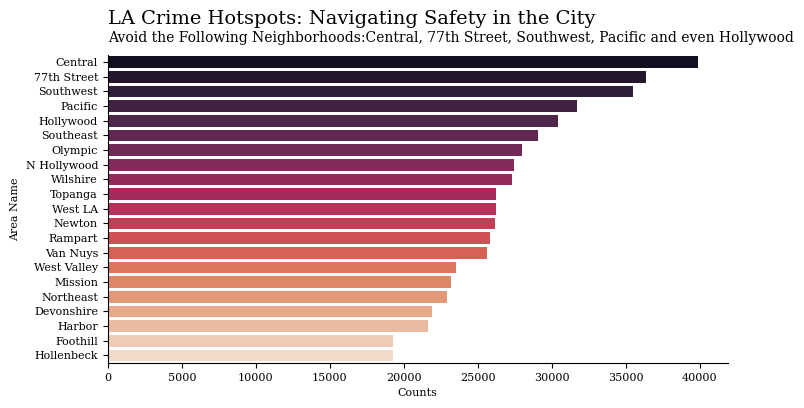

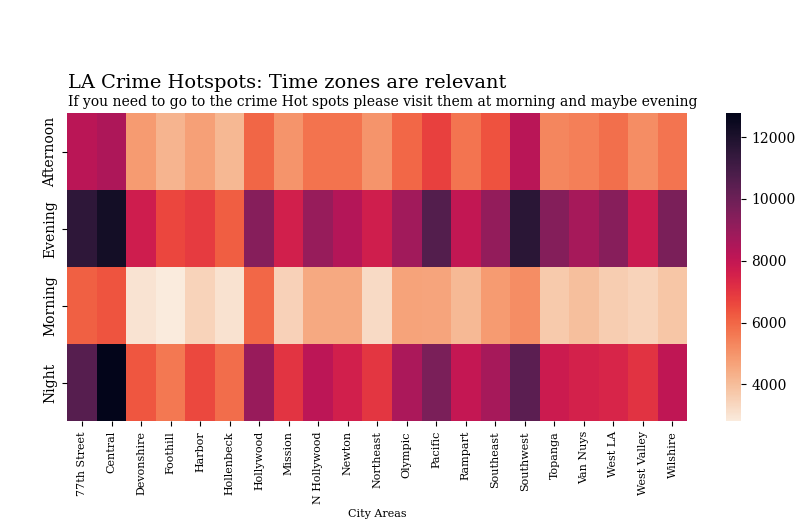

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crimeCount_byArea = pd.read_csv('crimeCount_byArea.csv')
crimeCount_byTimeOfDay = pd.read_csv('crimeCount_byTimeOfDay.csv')        
     
plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
color = 'rocket'

barplot = sns.barplot(x="total_count", y='AREA NAME', data=crimeCount_byArea, label="Total", palette='rocket')
plt.text(x=0.001, y=1.1, s="LA Crime Hotspots: Navigating Safety in the City", fontsize=14, transform=barplot.transAxes)
plt.text(x=0.001, y=1.04, s="Avoid the Following Neighborhoods:Central, 77th Street, Southwest, Pacific and even Hollywood", fontsize=10, transform=barplot.transAxes)

plt.xlabel("Counts",fontsize=8)
plt.ylabel("Area Name",fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)


plt.figure(figsize=(10,4))
plt.rcParams["font.family"] = "serif"
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

sns.heatmap(crimeCount_byTimeOfDay_pivot, fmt="d", cmap="rocket_r")  # 'fmt="d"' zeigt ganze Zahlen an
plt.text(x=-0.052, y=1.29, s="LA Crime Hotspots: Time zones are relevant", fontsize=14, transform=barplot.transAxes)
plt.text(x=-0.052, y=1.23, s="If you need to go to the crime Hot spots please visit them at morning and maybe evening", fontsize=10, transform=barplot.transAxes)

plt.xlabel("City Areas",fontsize=8)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)

plt.show()

# Gender Differences in Crime Victimization Across City Areas

In this analysis we delve into the pressing issue of gender disparities in crime victimization. This study aims to uncover critical insights into whether men or women are more frequently targeted as crime victims and to identify which city areas exhibit pronounced gender-specific victimization trend

As we see on the first hand, man are more often victims of crime in LA

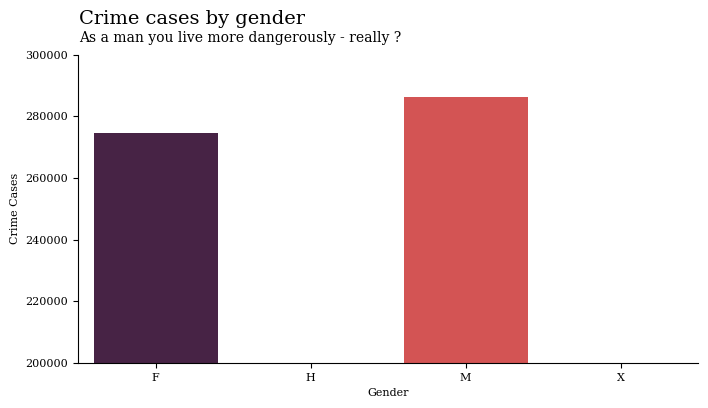

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

crimeCountsVictSex = pd.read_csv('crimeCountsVictSex.csv')
crimeCountsVictSex_byArea = pd.read_csv('crimeCountsVictSex_byArea.csv')

plt.figure(figsize=(8,4))
plt.rcParams["font.family"] = "serif"
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

barplot = sns.barplot(x="Vict Sex", y='total_count', data=crimeCountsVictSex, label="Total", palette='rocket')
plt.text(x=0.001, y=1.1, s="Crime cases by gender", fontsize=14, transform=barplot.transAxes)
plt.text(x=0.001, y=1.04, s="As a man you live more dangerously - really ?", fontsize=10, transform=barplot.transAxes)

plt.xlabel("Gender",fontsize=8)
plt.ylabel("Crime Cases",fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(200000,300000)



plt.show()